Importando bibliotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

In [6]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


Cotações ao Longo do Tempo

In [7]:
tickers = "ALPA4.SA BBAS3.SA CPFE3.SA HGTX3.SA SULA11.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
dados_yahoo

Retorno no Período

In [9]:
retorno = dados_yahoo.pct_change()
retorno

,ALPA4.SA,BBAS3.SA,CPFE3.SA,HGTX3.SA,SULA11.SA,^BVSP
Date,,,,,,
2016-02-18,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-19,0.001316,0.010878,-0.022552,0.000000,-0.002924,0.001567
2016-02-22,0.051248,0.046118,0.041287,0.000000,0.029912,0.040729
2016-02-23,0.011250,-0.006613,-0.031487,0.000000,-0.017654,-0.016514
2016-02-24,-0.004944,-0.033284,-0.004816,0.000000,-0.060870,-0.010254
...,...,...,...,...,...,...
2021-02-09,0.014460,0.012105,0.008358,-0.020478,-0.019854,-0.000728
2021-02-10,-0.019505,-0.013711,-0.005329,-0.019744,-0.018974,-0.008365
2021-02-11,0.004846,0.003845,0.004464,0.012441,0.002614,0.006797


Retorno Acumulado no Período

In [10]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ALPA4.SA,BBAS3.SA,CPFE3.SA,HGTX3.SA,SULA11.SA,^BVSP
Date,,,,,,
2016-02-18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-02-19,1.001316,1.010878,0.977448,1.000000,0.997076,1.001567
2016-02-22,1.052631,1.057498,1.017804,1.000000,1.026900,1.042360
2016-02-23,1.064473,1.050505,0.985757,1.000000,1.008772,1.025146
2016-02-24,1.059210,1.015540,0.981009,1.000000,0.947368,1.014634
...,...,...,...,...,...,...
2021-02-09,7.191577,3.323724,2.428594,2.545372,3.214147,2.879334
2021-02-10,7.051306,3.278154,2.415653,2.495115,3.153160,2.855249
2021-02-11,7.085474,3.290758,2.426437,2.526157,3.161402,2.874656


In [11]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ALPA4.SA,BBAS3.SA,CPFE3.SA,HGTX3.SA,SULA11.SA,saldo,retorno
Date,,,,,,,
2016-02-18,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2016-02-19,10013.156885,10108.780319,9774.478986,10000.000000,9970.756738,49867.172929,-0.002657
2016-02-22,10526.313984,10574.978649,10178.041209,10000.000000,10269.002324,51548.336167,0.033713
2016-02-23,10644.734523,10505.050888,9857.565387,10000.000000,10087.716423,51095.067222,-0.008793
2016-02-24,10592.103554,10155.400060,9810.088325,10000.000000,9473.681025,50031.272964,-0.020820
...,...,...,...,...,...,...,...
2021-02-09,71915.767810,33237.239721,24285.942114,25453.723231,32141.465486,187034.138362,0.002362
2021-02-10,70513.055055,32781.539108,24156.531896,24951.152376,31531.600399,183933.878833,-0.016576
2021-02-11,70854.744749,32907.581991,24264.374658,25261.565113,31614.016299,184902.282811,0.005265


# 3. Resultados

Start date,2016-02-18
End date,2021-02-18
Total months,59
,Backtest
Annual return,29.127%
Cumulative returns,252.848%
Annual volatility,32.208%
Sharpe ratio,0.96
Calmar ratio,0.56
Stability,0.86
Max drawdown,-51.561%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,51.56,2020-01-03,2020-03-18,NaT,NaN
1,33.44,2017-10-24,2018-06-18,2018-11-01,268
2,11.33,2017-05-12,2017-05-22,2017-08-02,59
3,10.83,2019-02-05,2019-03-27,2019-05-31,84
4,10.75,2016-03-11,2016-03-15,2016-04-15,26


Stress Events,mean,min,max
New Normal,0.12%,-16.90%,24.93%


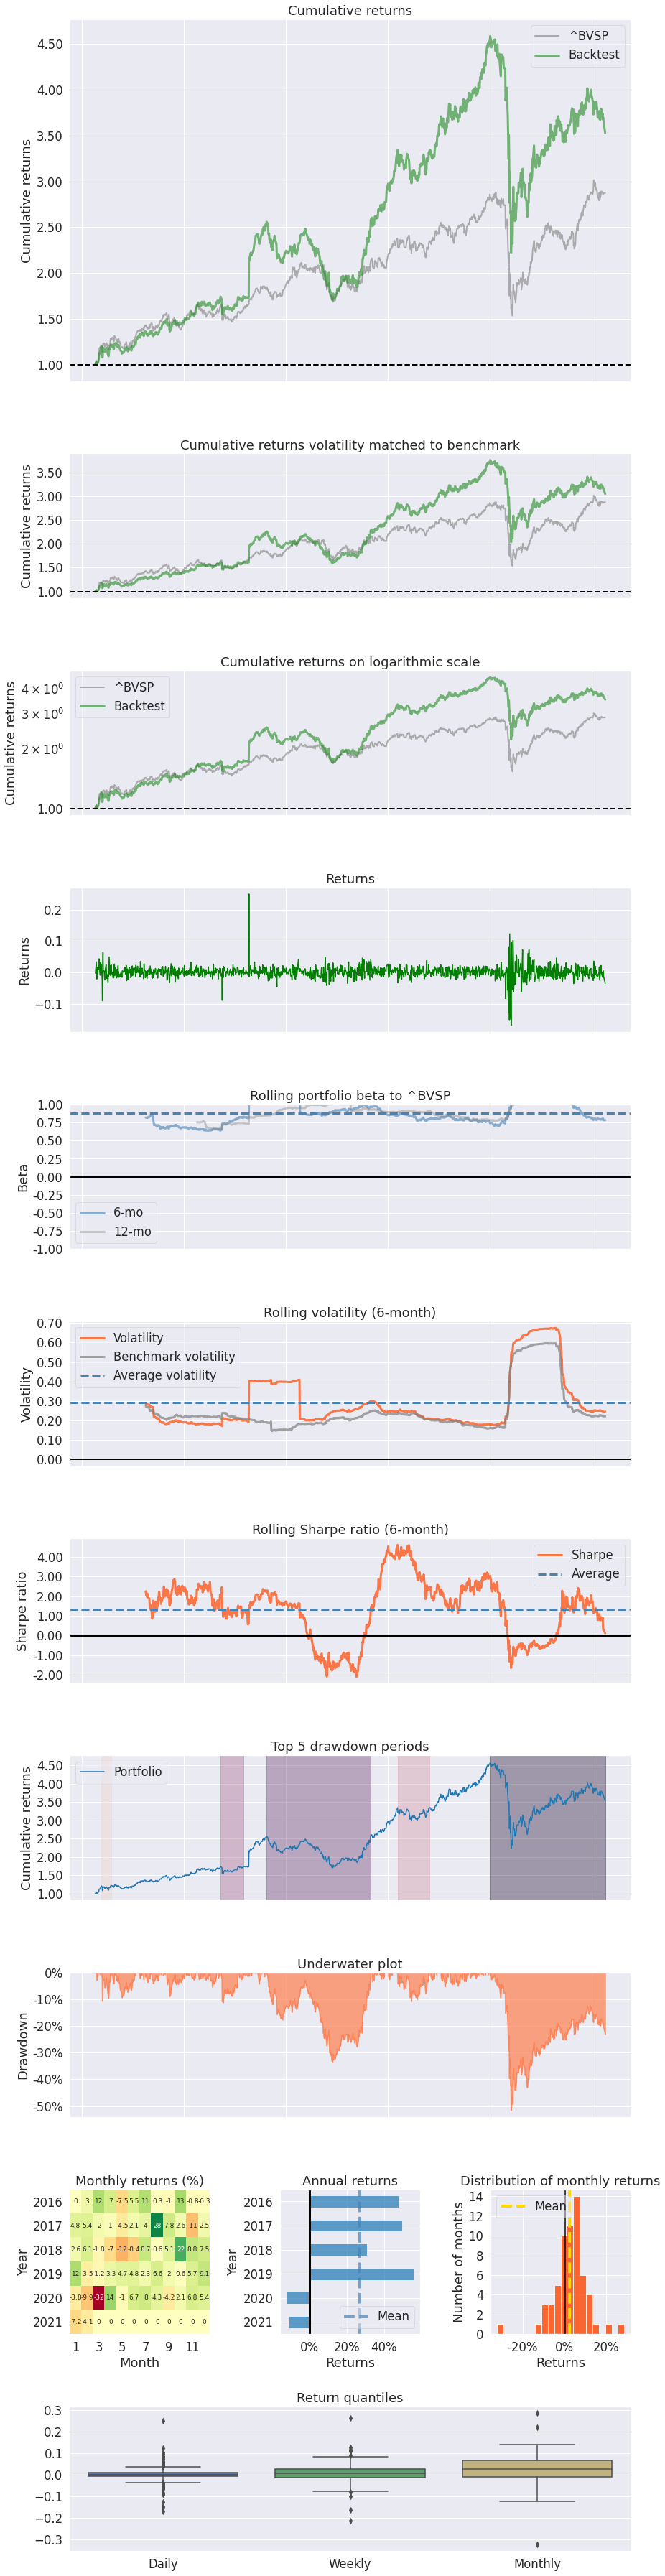

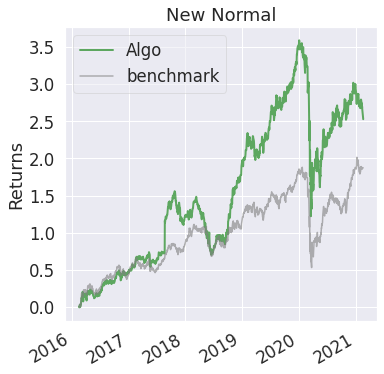

In [12]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

BETA X IBOVESPA (IMAGEM CORTADA)

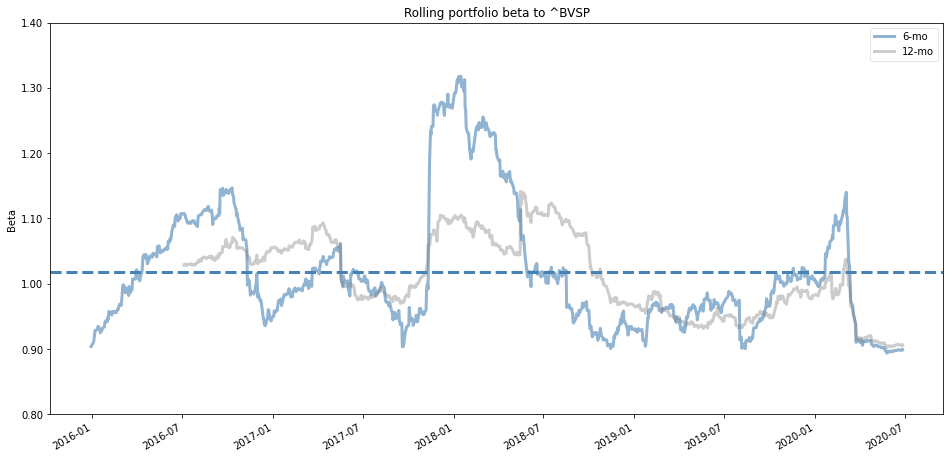

In [ ]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));